In [102]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [103]:
train = pd.read_csv("/Users/hellothere/choi/07.study/dsschool/03. ipython_dl/data/train.csv")

print(train.shape)
train.head()

(2000, 2)


,filename,target
0,0.jpg,0
1,1.jpg,0
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [104]:
test = pd.read_csv("/Users/hellothere/choi/07.study/dsschool/03. ipython_dl/data/test.csv")

print(test.shape)
test.head()

(2000, 2)


,filename,target
0,0.jpg,0
1,1.jpg,0
2,2.jpg,0
3,3.jpg,0
4,4.jpg,1


## Load Images

In [105]:
# from matplotlib.pyplot import imread
from scipy.ndimage import imread

def load_images(filenames, default_path):
    images = []

    for filename in filenames:
        filepath = default_path + filename

        image = imread(filepath)
        images.append(image)

    images = np.array(images)

    return images

In [106]:
X_train = load_images(train["filename"], "/Users/hellothere/choi/07.study/dsschool/03. ipython_dl/data/train/")
X_train.shape

(2000,)

In [107]:
X_test = load_images(test["filename"], "/Users/hellothere/choi/07.study/dsschool/03. ipython_dl/data/test/")
X_test.shape

(2000,)

In [108]:
y_train = train["target"].values

print(y_train.shape)
y_train[0:10]

(2000,)


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0])

In [109]:
y_test = test["target"].values

print(y_test.shape)
y_test[0:10]

(2000,)


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

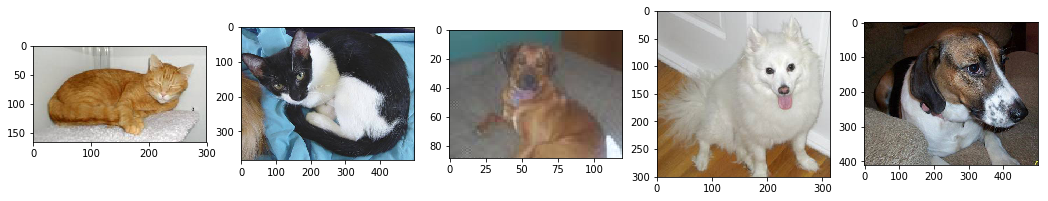

In [110]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_train[0])
axes[1].imshow(X_train[1])
axes[2].imshow(X_train[2])
axes[3].imshow(X_train[3])
axes[4].imshow(X_train[4])

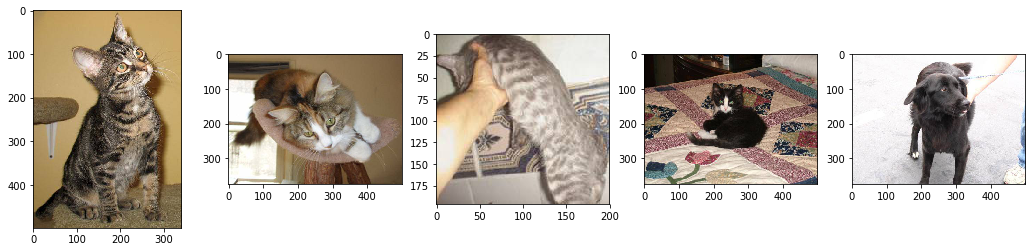

In [111]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_test[0])
axes[1].imshow(X_test[1])
axes[2].imshow(X_test[2])
axes[3].imshow(X_test[3])
axes[4].imshow(X_test[4])

## Preprocessing

### Resize Images

In [112]:
#from tqdm import tqdm
from scipy.misc import imresize

def resize_image(original_images, size):
    resized_images = []
    
    for original_image in original_images:
        resized_image = imresize(original_image, size)
        resized_images.append(resized_image)
        
    resized_images = np.array(resized_images)
    
    return resized_images

In [113]:
X_train_224 = resize_image(X_train, (224, 224))
X_train_224.shape

(2000, 224, 224, 3)

In [114]:
X_test_224 = resize_image(X_test, (224, 224))
X_test_224.shape

(2000, 224, 224, 3)

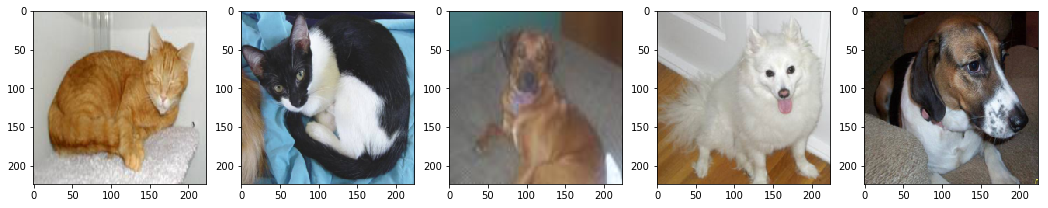

In [115]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_train_224[0])
axes[1].imshow(X_train_224[1])
axes[2].imshow(X_train_224[2])
axes[3].imshow(X_train_224[3])
axes[4].imshow(X_train_224[4])

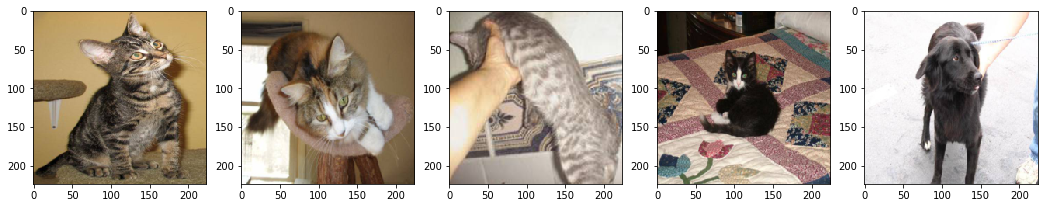

In [116]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_test_224[0])
axes[1].imshow(X_test_224[1])
axes[2].imshow(X_test_224[2])
axes[3].imshow(X_test_224[3])
axes[4].imshow(X_test_224[4])

## Build a Model

### Tiny CNN Model

In [117]:
# Write your code here!

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D , Flatten , Dense


model = Sequential()
model.add (Conv2D(filters=16, kernel_size=(3,3) , activation='relu', padding='same', kernel_initializer='he_uniform'
                  , input_shape=(224,224,3))) 

model.add (Conv2D(filters=16, kernel_size=(3,3) , activation='relu', padding='same', kernel_initializer='he_uniform'
                 )) 
model.add(MaxPooling2D(pool_size=(2,2) , strides=(2,2)))

model.add (Conv2D(filters=32, kernel_size=(3,3) , activation='relu', padding='same', kernel_initializer='he_uniform'
                  , input_shape=(224,224,3))) 

model.add (Conv2D(filters=32, kernel_size=(3,3) , activation='relu', padding='same', kernel_initializer='he_uniform'
                 )) 
model.add(MaxPooling2D(pool_size=(2,2) , strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform'))


model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_173 (Conv2D)          (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 100352)            0         
__________

In [ ]:
model.compile(optimizer='sgd',loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_224, y_train, epochs=1 )

Epoch 1/1
1632/2000 [=======================>......] - ETA: 20s - loss: 8.0739 - acc: 0.4975

### VGG-16 w/ Pre-trained Model

In [54]:
!pip install h5py

You are using pip version 9.0.3, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
# Write your code here!
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D , Flatten , Dense


model = Sequential()
model.add (Conv2D(filters=64, kernel_size=(3,3) , activation='relu', padding='same', trainable=False
                  , input_shape=(224,224,3))) 
model.add (Conv2D(filters=64, kernel_size=(3,3) , activation='relu', padding='same', trainable=False
                  ))
model.add(MaxPooling2D(pool_size=(2,2) , strides=(2,2)))

model.add (Conv2D(filters=128, kernel_size=(3,3) , activation='relu', padding='same', trainable=False
                  , input_shape=(224,224,3))) 
model.add (Conv2D(filters=128, kernel_size=(3,3) , activation='relu', padding='same', trainable=False
                  )) 
model.add(MaxPooling2D(pool_size=(2,2) , strides=(2,2)))

model.add (Conv2D(filters=256, kernel_size=(3,3) , activation='relu', padding='same', trainable=False
                  , input_shape=(224,224,3))) 
model.add (Conv2D(filters=256, kernel_size=(3,3) , activation='relu', padding='same', trainable=False
                  )) 
model.add(MaxPooling2D(pool_size=(2,2) , strides=(2,2)))

model.add (Conv2D(filters=512, kernel_size=(3,3) , activation='relu', padding='same', trainable=False
                  , input_shape=(224,224,3))) 
model.add (Conv2D(filters=512, kernel_size=(3,3) , activation='relu', padding='same', trainable=False
                  )) 
model.add(MaxPooling2D(pool_size=(2,2) , strides=(2,2)))
model.add (Conv2D(filters=512, kernel_size=(3,3) , activation='relu', padding='same', trainable=False
                  , input_shape=(224,224,3))) 
model.add (Conv2D(filters=512, kernel_size=(3,3) , activation='relu', padding='same', trainable=False
                  )) 
model.add(MaxPooling2D(pool_size=(2,2) , strides=(2,2)))

model.load_weights("/Users/hellothere/choi/07.study/dsschool/03. ipython_dl/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5");

model.add(Flatten())

model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform'))

model.summary()



In [ ]:
from keras.optimizers import SGD

optimizer = SGD(lr = 0.0001, momentum =0.9 )
model.compile(optimizer=optimizer,loss = 'binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train_224, y_train, epochs=1 )